<a href="https://colab.research.google.com/github/rombolaagustin/ml-practice/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive # Para montar nuestro drive en la consola
import pandas as pd

In [ ]:
def sigmoid(x, a, b):
  return 1/(1+np.exp(a + b*x))

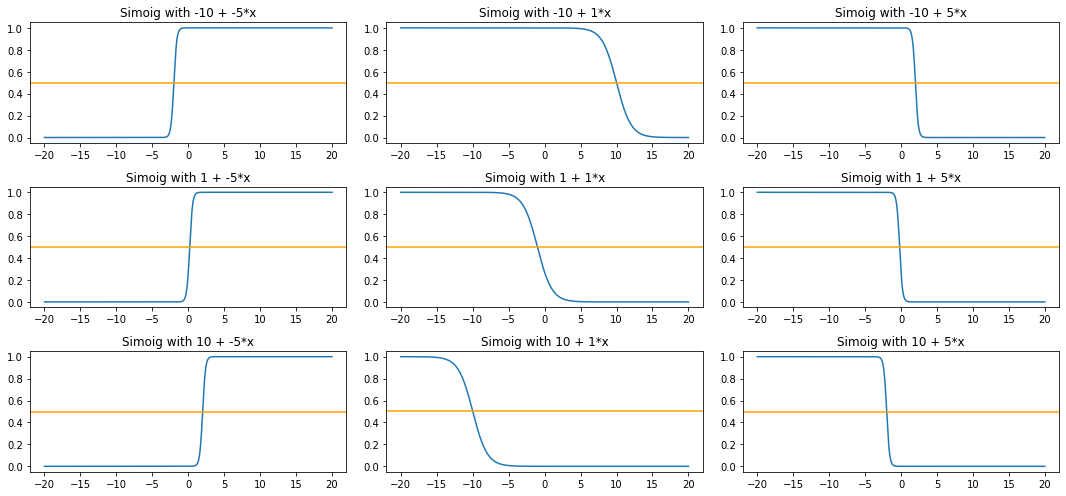

In [ ]:
x = np.linspace(start=-20, stop=20, num=1000)


plt.figure(figsize=(15,7))
num = 330
for i in [-10, 1, 10]:
  for j in [-5, 1, 5]:
    num += 1
    plt.subplot(num)
    plt.title(f"Simoig with {i} + {j}*x")
    plt.plot(x, sigmoid(x, a=i, b=j))
    plt.axhline(y=0.5, color='orange')
plt.tight_layout()    
plt.show()

Como se observa en los gráficos un aumento de **a** produce un corrimiento del **threshold** hacia la izquierda y viceversa. Un aumento en modulo de **b** produce que la sigmoide se paresca a una función escalon de heavyside. A su vez una b negativa produce que y = 0 quede a la izquierda e y = 1 a la derecha y viceversa.

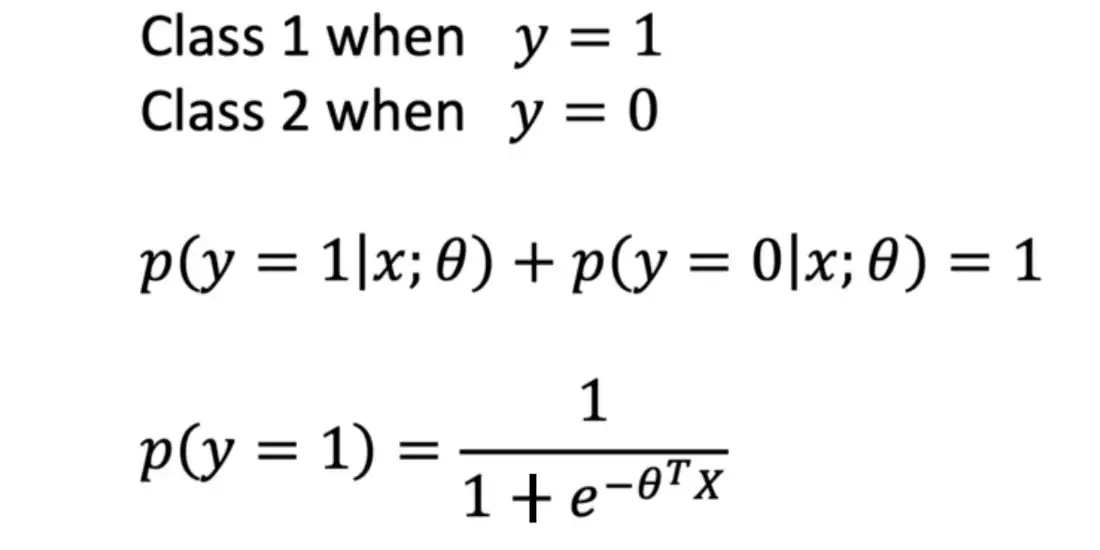

El vector theta será el **parameter vector** y X será el **feature vector**. En este caso, X_0 = 1 por default y serán n features tal que x = (1, x1, ..., xn)

# Loss/Cost Function

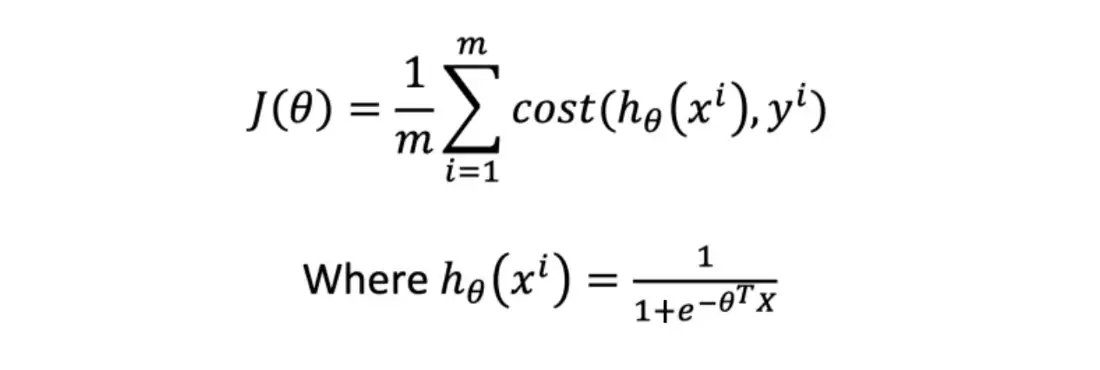

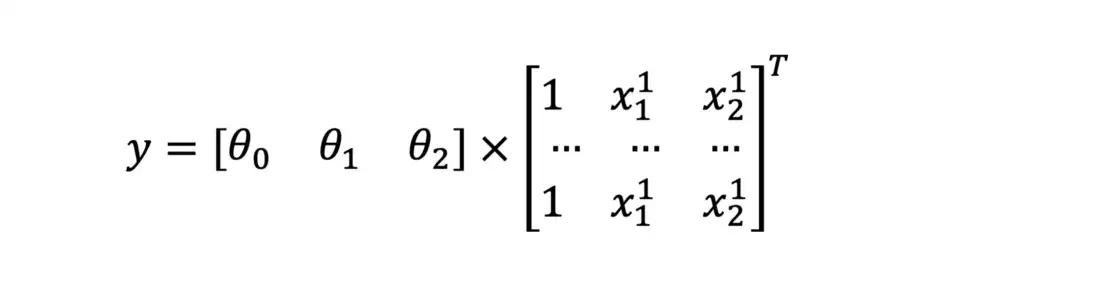

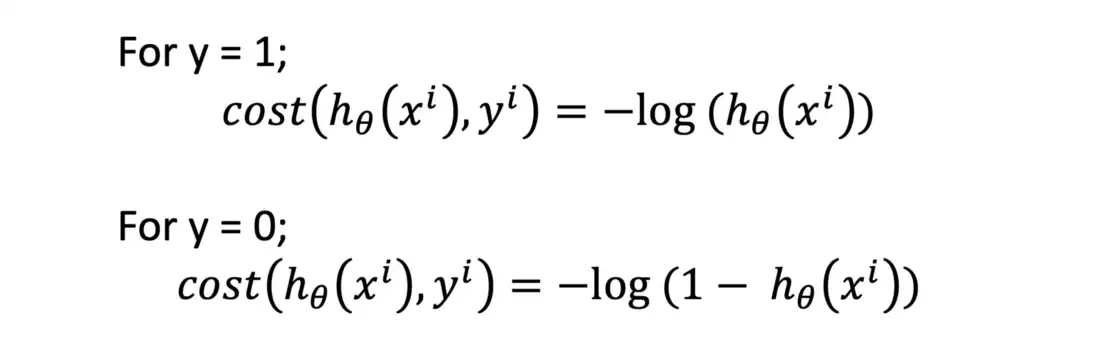

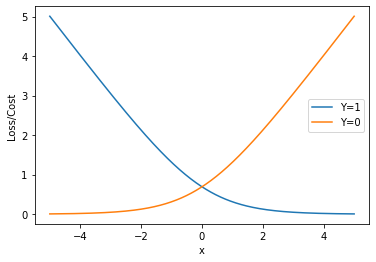

In [ ]:
x_loss = np.linspace(start=-5, stop=5, num=500)
y_cost_1 = -np.log(sigmoid(x_loss, 0, -1)) 
y_cost_0 = -np.log(1 - sigmoid(x_loss, 0, -1)) 

plt.plot(x_loss, y_cost_1, label='Y=1')
plt.plot(x_loss, y_cost_0, label='Y=0')
plt.ylabel('Loss/Cost')
plt.xlabel('x')
plt.legend()
plt.show()

# Using Sklearn to Logistic Regression

[[0.70544907 0.51315444]]
[-0.77288972]


array([[0.66156111, 0.33843889],
       [0.30214201, 0.69785799],
       [0.34569688, 0.65430312],
       [0.27710485, 0.72289515],
       [0.41348756, 0.58651244]])

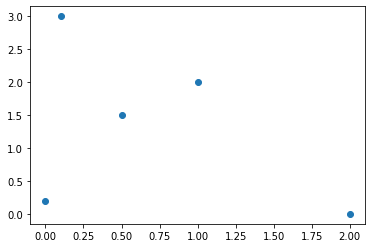

In [ ]:
from sklearn.linear_model import LogisticRegression

X = np.array([[0, 0.2, 0.1, 3, 2], [0, 1, 2, 0.5, 1.5]])
X = X.reshape(-1 ,2)
plt.scatter(X[:, 0], X[:, 1])
y = np.array([0, 1 , 1, 1, 0])


clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.coef_)
print(clf.intercept_)

clf.predict_proba(X)


In [ ]:
# Traemos los datos
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

filename = '/content/drive/My Drive/datasets/julio_2012_datos_meteo.csv'

df = pd.read_csv(filename, delimiter=';') # Levantamos los datos

# Dummy variable si llueve o no
df.loc[df['Lluvia']>0, 'Llueve'] = 1
df.loc[df['Lluvia'] == 0, 'Llueve'] = 0
print(df.head())
df['Llueve'].value_counts()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Dia   Min   Max  Prom  Humedad  Viento Direccion_viento  Recorrido_viento  \
0    1  15.5  19.6  17.3      100      26            Calma              77.3   
1    2   7.5  16.2  10.8       86      37            Norte             199.9   
2    3   5.6  13.1   8.3       80      26            Calma              69.4   
3    4   5.9   9.4   7.9       98      22            Calma              46.1   
4    5   4.3  12.3   7.4       74      33            Norte             101.6   

   Lluvia  Presion_min  Presion_max  Llueve  
0     0.0       1004.2       1009.4     0.0  
1     6.8       1008.8       1024.1     1.0  
2     0.0       1016.5       1024.5     0.0  
3     6.2       1006.5       1016.5     1.0  
4     0.0       1011.3       1022.2     0.0  


0.0    25
1.0     6
Name: Llueve, dtype: int64

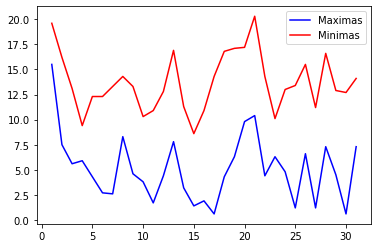

In [ ]:
plt.plot(df['Dia'], df['Min'], color='blue', label='Maximas')
plt.plot(df['Dia'], df['Max'], color='red', label='Minimas')
plt.legend()
plt.show()

El score del model es 0.8064516129032258
Beta0 = [-1.7577124] // Beta1 = [[0.06287033]]
El score del model es 0.8064516129032258
Beta0 = [1.06572517] // Beta1 = [[-0.18782153]]
El score del model es 0.8064516129032258
Beta0 = [-0.51609079] // Beta1 = [[-0.10126455]]
El score del model es 0.7741935483870968
Beta0 = [-9.48229573] // Beta1 = [[0.10022645]]
El score del model es 0.8064516129032258
Beta0 = [-1.35473219e-06] // Beta1 = [[-0.00140999]]
El score del model es 0.8064516129032258
Beta0 = [-1.33997125e-06] // Beta1 = [[-0.00139736]]


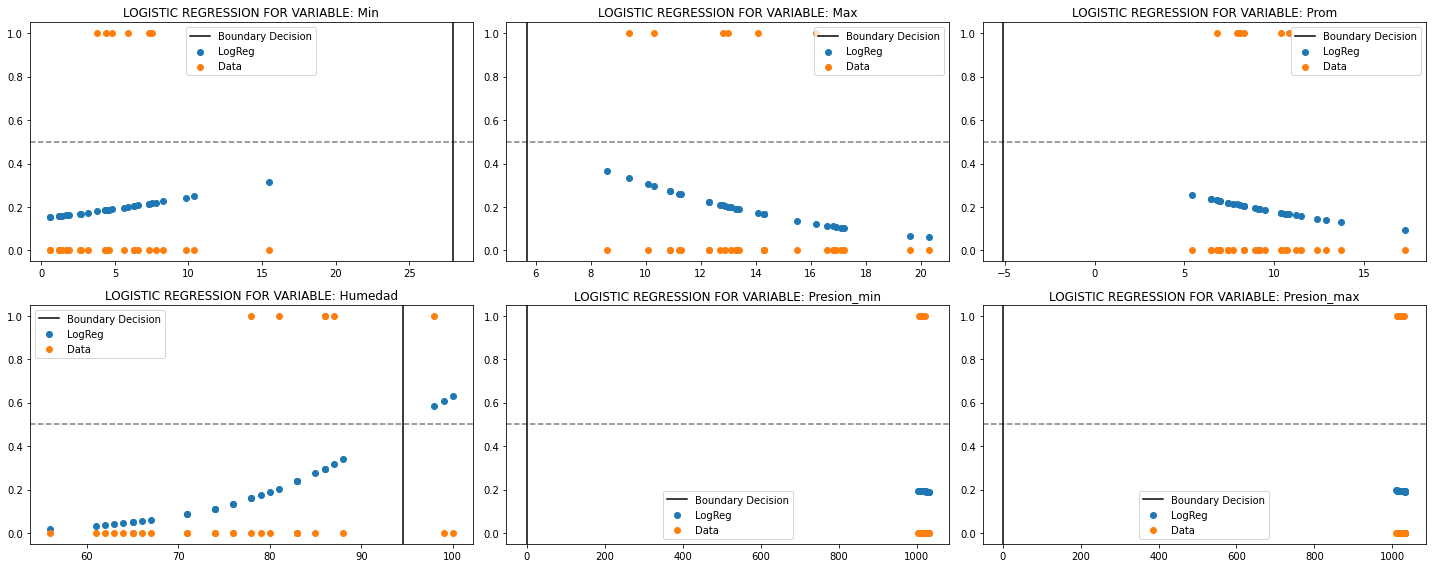

In [ ]:
from sklearn.linear_model import LogisticRegression

features = ['Min', 'Max', 'Prom', 'Humedad', 'Presion_min', 'Presion_max']
plt.figure(figsize=(20,8))
nplot = 0


def sigmoid(x, beta_0, beta_1):
  return 1/(1+np.exp(-beta_0 - beta_1*x))

for feature in features:
  nplot += 1
  X = df[feature].values.reshape(-1, 1)
  y = df['Llueve'] # Dummy variable

  regLog = LogisticRegression(penalty='none') # Penalty = None porque no vamos a usar regularizacion
  regLog.fit(X, y)
  score = regLog.score(X, y) # Score del ajuste
  print(f"El score del model es {score}")

  beta_0 = regLog.intercept_
  beta_1 = regLog.coef_
  print(f"Beta0 = {beta_0} // Beta1 = {beta_1}")


  
  plt.subplot(2, 3, nplot)
  plt.title(f'LOGISTIC REGRESSION FOR VARIABLE: {feature}')
  plt.scatter(X,
              sigmoid(X, beta_0, beta_1),
              label='LogReg')
  plt.scatter(X, y, label='Data')
  plt.axvline(-beta_0/beta_1, color='black', label='Boundary Decision')
  plt.axhline(0.5, color='black', linestyle='dashed', alpha=0.5)
  plt.legend()
plt.tight_layout()   
plt.show()

PAREJA --> ['Humedad', 'Presion_max']
El score del model es 0.7741935483870968
Beta0 = [1.4636471e-05] // Beta1 = 0.09842660303508428 // Beta2 = -0.009127828862260155
-----------------------------------------------------------
PAREJA --> ['Presion_min', 'Presion_max']
El score del model es 0.8064516129032258
Beta0 = [0.00044952] // Beta1 = -0.06720037689287799 // Beta2 = 0.06522516288728164
-----------------------------------------------------------
PAREJA --> ['Min', 'Humedad']
El score del model es 0.7741935483870968
Beta0 = [-9.95141591] // Beta1 = -0.0655350470866305 // Beta2 = 0.11007121906398465
-----------------------------------------------------------
PAREJA --> ['Prom', 'Humedad']
El score del model es 0.8064516129032258
Beta0 = [-9.08962875] // Beta1 = -0.19202057776887582 // Beta2 = 0.11642405974255067
-----------------------------------------------------------
PAREJA --> ['Humedad', 'Recorrido_viento']
El score del model es 0.8387096774193549
Beta0 = [-28.11039624] // Beta

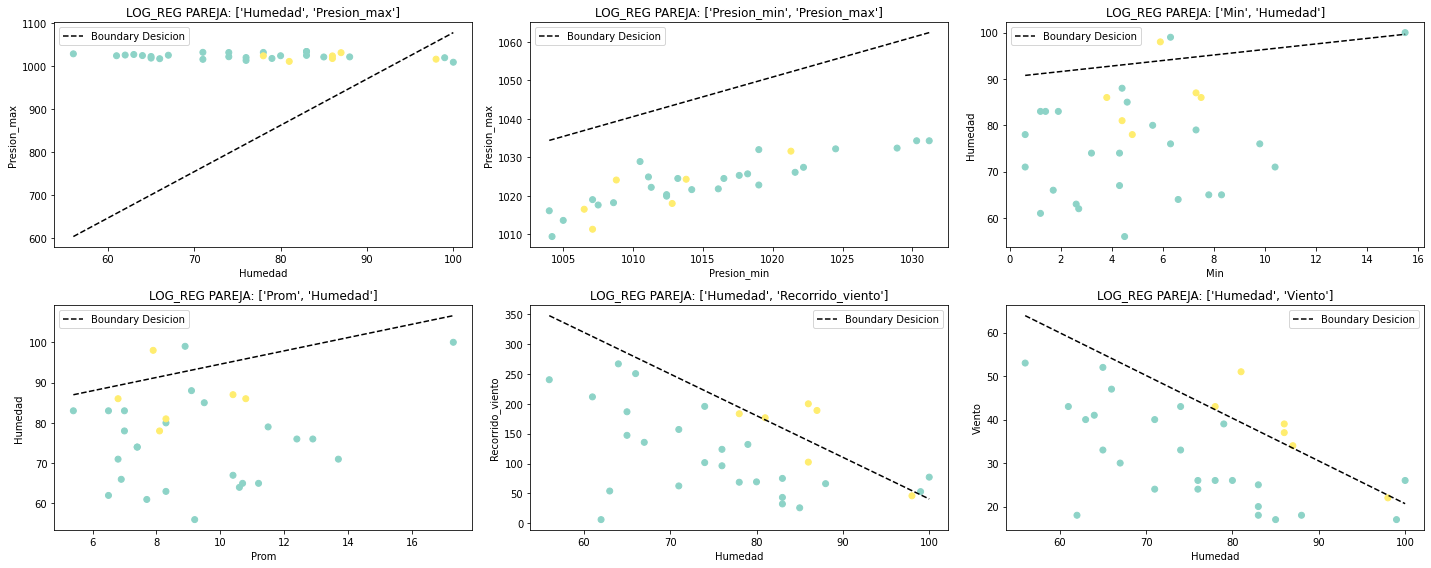

In [ ]:
# Usando variables variables

from sklearn.linear_model import LogisticRegression

# Para probar distintas parejas
features = [
    ['Humedad', 'Presion_max'],
    ['Presion_min', 'Presion_max'],
    ['Min', 'Humedad'],
    ['Prom', 'Humedad'],
    ['Humedad', 'Recorrido_viento'],
    ['Humedad', 'Viento'],
]
nplot = 0

plt.figure(figsize=(20,8))

for feature in features:
  nplot += 1
  X = df[feature]
  y = df['Llueve'] # Dummy variable

  regLog = LogisticRegression(penalty='none') # Penalty = None porque no vamos a usar regularizacion
  regLog.fit(X, y)
  score = regLog.score(X, y) # Score del ajuste
  print(f'PAREJA --> {feature}')
  print(f"El score del model es {score}")
  beta_0 = regLog.intercept_
  beta_1 = regLog.coef_[0][0]
  beta_2 = regLog.coef_[0][1]
  print(f"Beta0 = {beta_0} // Beta1 = {beta_1} // Beta2 = {beta_2}")
  print("-----------------------------------------------------------")

  plt.subplot(2, 3, nplot)
  plt.title(f'LOG_REG PAREJA: {feature}')
  plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y, cmap='Set3')
  plt.xlabel(feature[0])
  plt.ylabel(feature[1])

  x_bound = np.linspace(np.min(X.iloc[:,0].values), np.max(X.iloc[:,0].values), num=100)
  y_bound = - (beta_0 + x_bound*beta_1)/beta_2

  plt.plot(x_bound,
           y_bound,
           color='black',
           linestyle='dashed',
           label='Boundary Desicion')
  plt.legend()

plt.tight_layout()
plt.show()